### **Importações iniciais**

In [ ]:
# Importações básicas
!pip install -q seaborn

In [ ]:
import os

# Importações de visualização
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Importação do Dataset - Google Drive
from google.colab import files

In [ ]:
# Importações de pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Normalização de dados
from sklearn.preprocessing import RobustScaler

# Redução de dimensionalidade / testa a independência entre variáveis
from sklearn.feature_selection import chi2

In [ ]:
# Importações extra
import itertools

In [ ]:
# Importando o Dataset Fetal Health
# Carregando o dataset
if not os.path.exists('fetal_health.csv'):
    uploaded = files.upload()

    for filename in uploaded.keys():
        if filename != 'fetal_health.csv':

            os.rename(
                filename,
                'fetal_health.csv'
                )

df = pd.read_csv('fetal_health.csv')

Saving fetal_health.csv to fetal_health.csv


In [ ]:
# Analisando se o carregamento foi correto
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# Número de samples x números de cols
n_linhas = df.shape[0]
n_colunas = df.shape[1]

print(f"Número de linhas: {n_linhas} e número de colunas: {n_colunas}")

Número de linhas: 2126 e número de colunas: 22


### Análise de dados

###**Limpeza de dados**

Verificando valores faltantes

In [ ]:
# Mostra se há valores faltantes em cada coluna
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


Não há valores faltantes, logo não é preciso fazer imputação

Tratando duplicatas

In [ ]:
# Verifica se há duplicatas
num_duplicatas = df.duplicated().sum()

if num_duplicatas > 0:
    df.drop_duplicates(inplace=True)

    print(f"Existem {num_duplicatas} linhas duplicadas.")

else:
    print("Não há duplicatas.")

Existem 13 linhas duplicadas.


In [ ]:
# Elimina as duplicatas
df.drop_duplicates(inplace=True)

In [ ]:
# Verifica se há duplicatas
num_dd = df.duplicated().sum()

if num_dd > 0:
    df.drop_duplicates(inplace=True)

    print(f"Ainda há {num_duplicatas} linhas duplicadas.")

else:
    print("As duplicatas foram tratadas.")

As duplicatas foram tratadas.


###**Seleção de features**

In [ ]:
# A coluna alvo é "fetal_health"

In [ ]:
# Verificando a tipagem das features
features_categoricas = df.select_dtypes(include=['object', 'category'])
features_numericas = df.select_dtypes(include=['int64', 'float64'])

num_cat = len(features_categoricas.columns)
num_num = len(features_numericas.columns)

if num_cat == 0:
    print("Não há features categóricas.")

if num_num == 0:
    print("Não há features numéricas.")

Não há features categóricas.


In [ ]:
# Considerando a correlação identificada na EDA feita,
# as seguintes features foram removidas como redução de dimensionalidade

# Dados relacionados ao feto
features_FEliminar = [
    "percentage_of_time_with_abnormal_long_term_variability",
    "mean_value_of_short_term_variability",
    ]

# Dados relacionados ao histograma (contrações da mãe)
features_HEliminar = [
    "histogram_median",
    "histogram_mean",
    "histogram_mode",
    "histogram_number_of_peaks",
    "histogram_number_of_zeroes",
    "histogram_min",
    "histogram_max",
    "histogram_width"
    ]

df.drop(columns=features_FEliminar, axis=1, inplace=True)
df.drop(columns=features_HEliminar, axis=1, inplace=True)

In [ ]:
# Verificando as features restantes
num_num = len(df.columns)

print(f"Número de features restantes: {num_num}")

Número de features restantes: 12


###**Separação entre treino e teste**



In [ ]:
# Separando features da coluna alvo
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Binarização do problema (normal x anormal)
y = y.replace(3, 2)

df['fetal_health'] = y

# Separação entre treino e teste (usando o padrão 70% x 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42,
    )

###**Normalização de features**



Identificando outliers

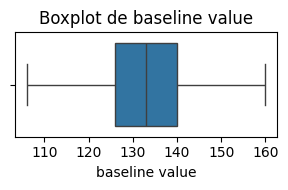

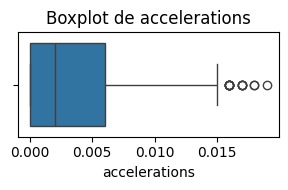

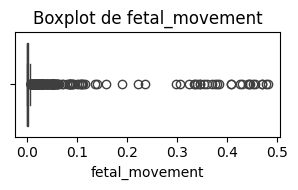

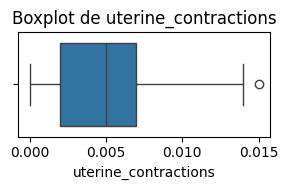

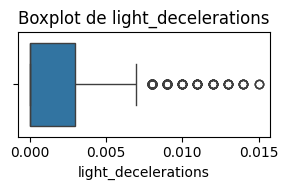

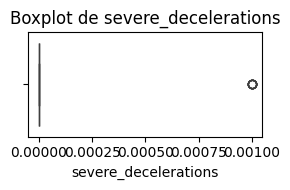

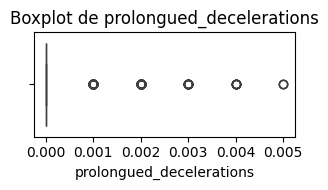

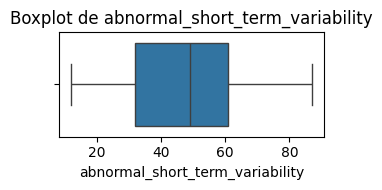

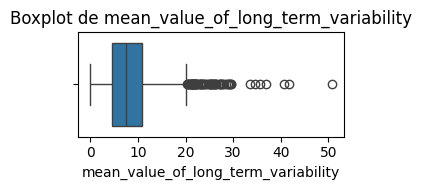

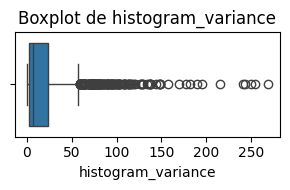

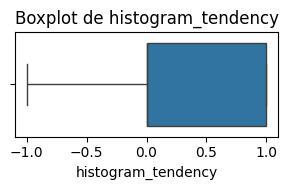

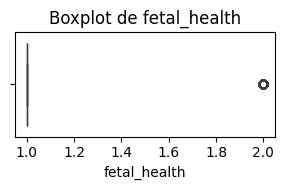

In [ ]:
# Visualizando se há valores extremos
# Redefinindo após a eliminação de 4 colunas
features_numericas = df.select_dtypes(include=['int64', 'float64'])

for col in features_numericas.columns:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x=df[col])

    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.tight_layout()

    plt.show()

In [ ]:
# Como visto, há muitos outliers
# Para isso será usado o RobustScaler, que lida melhor com outliers preciosos
# Melhor análise de fetos de sinais suspeitos ou patologicos (classes minoritarias)

scaler = RobustScaler()

# Ajuste da parte de treino e de teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**Balanceamento de Classes**



In [ ]:
# Distribuição absoluta e percentual da coluna alvo
# A coluna alvo é fetal_health
print("Distribuição absoluta da coluna alvo")
print(df['fetal_health'].value_counts())
print("\nDistribuição percentual da coluna alvo")
print(df['fetal_health'].value_counts(normalize=True)*100)

# Sendo que a saúde do feto é representada por:
# 1 saudável
# 2 suspeito ou patológico
# A binarização do problema foi aplicada

Distribuição absoluta da coluna alvo
fetal_health
1.0    1646
2.0     467
Name: count, dtype: int64

Distribuição percentual da coluna alvo
fetal_health
1.0    77.898722
2.0    22.101278
Name: proportion, dtype: float64


O desbalanceamento de classes é nítido. Como o número de dados de fetos saudáveis é tão maior que de fetos de sinais suspeitos e patológicos, o UnderSampling reduziria muito o banco de dados. Sendo assim, é melhor utilizar o OverSampling ou o SMOTE.

Já que a modelagem é feita em outro notebook, o balanceamento de classes será feito em outro espaço para não comprometer a integridade dos dados de teste.

###Baixando o novo dataset, que será usado na modelagem

In [ ]:
cols = X.columns

# Redefinindo o dataset que será exportado
# Treino
df_train_export = pd.DataFrame(X_train_scaled, columns=cols)
df_train_export['fetal_health'] = y_train.values

# Teste
df_test_export = pd.DataFrame(X_test_scaled, columns=cols)
df_test_export['fetal_health'] = y_test.values

In [ ]:
# Baixando o dataset de forma separada
df_train_export.to_csv('fetal_health_train.csv', index=False)
df_test_export.to_csv('fetal_health_test.csv', index=False)

files.download('fetal_health_train.csv')
files.download('fetal_health_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>